In [263]:
import tensorflow as tf
import numpy as np
from numpy import savetxt, loadtxt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from numpy import savetxt, loadtxt

In [264]:
t_tag = pd.read_csv('tt-data.csv', delimiter=',')

In [265]:
# copy the data 
t_tag_max_scaled = t_tag.copy() 

# apply normalization techniques 
for column in t_tag_max_scaled.columns: 
    t_tag_max_scaled[column] = t_tag_max_scaled[column] / t_tag_max_scaled[column].abs().max() 


In [266]:
t_tag_max_scaled = t_tag_max_scaled.drop(axis=1, labels='Unnamed: 0')

In [267]:
display(t_tag_max_scaled)

fjet_C2   fjet_D2  fjet_ECF1  fjet_ECF2  fjet_ECF3   fjet_L2  \
0       0.216875  0.061044   0.256385   0.013884   0.000206  0.765606   
1       0.081845  0.072762   0.255832   0.004377   0.000008  0.719189   
2       0.196780  0.069160   0.158920   0.004272   0.000028  0.885280   
3       0.387334  0.071255   0.526063   0.089434   0.007426  0.535799   
4       0.310123  0.062125   0.254090   0.019160   0.000565  0.743857   
...          ...       ...        ...        ...        ...       ...   
499995  0.235041  0.057888   0.078850   0.001501   0.000008  0.954727   
499996  0.178329  0.083505   0.121096   0.001862   0.000006  0.785969   
499997  0.341924  0.072867   0.456155   0.058047   0.003185  0.696204   
499998  0.148902  0.048453   0.305770   0.017082   0.000179  0.379980   
499999  0.464142  0.058790   0.338583   0.053806   0.005004  0.608591   

         fjet_L3   fjet_Qw  fjet_Split12  fjet_Split23  ...  fjet_Tau2_wta  \
0       0.579557  0.058027      0.018628      0.036556  ...       0.134667   
1       0.532482  0.023101      0.005931      0.010440  ...       0.042430   
2       0.627689  0.035393      0.014337      0.013636  ...       0.120055   
3       0.309581  0.169886      0.126166      0.108779  ...       0.141865   
4       0.505459  0.080120      0.028791      0.044916  ...       0.144984   
...          ...       ...           ...           ...  ...            ...   
499995  0.826280  0.020614      0.012674      0.009714  ...       0.161063   
499996  0.398112  0.021636      0.014159      0.004689  ...       0.052477   
499997  0.508481  0.178061      0.051360      0.088097  ...       0.162642   
499998  0.290839  0.047803      0.035846      0.018562  ...       0.048707   
499999  0.513785  0.176629      0.070563      0.107663  ...       0.251440   

        fjet_Tau3_wta  fjet_Tau4_wta  fjet_ThrustMaj  fjet_eta    fjet_m  \
0            0.142993       0.119023        0.893817  0.477331  0.060068   
1            0.049131       0.038885        0.693176 -0.052974  0.023058   
2            0.134905       0.134177        0.908825  0.710855  0.027561   
3            0.087522       0.095030        0.893337 -0.093045  0.210248   
4            0.139475       0.069405        0.739921 -0.148170  0.079290   
...               ...            ...             ...       ...       ...   
499995       0.226517       0.230407        0.860939 -0.537175  0.018649   
499996       0.071788       0.075733        0.969800  0.557862  0.018217   
499997       0.192987       0.195067        0.697143  0.493174  0.145376   
499998       0.042273       0.045442        0.893777  0.656151  0.067343   
499999       0.285286       0.264510        0.885203  0.033350  0.180946   

        fjet_phi   fjet_pt  labels   weights  
0       0.497866  0.252929     0.0  0.196490  
1      -0.634805  0.251895     0.0  0.196490  
2       0.888728  0.163170     0.0  0.110794  
3       0.225296  0.517328     0.0  0.376087  
4       0.440927  0.247673     1.0  0.243573  
...          ...       ...     ...       ...  
499995  0.542903  0.077373     0.0  0.038381  
499996 -0.297271  0.120132     0.0  0.067096  
499997  0.366766  0.443765     1.0  0.243573  
499998  0.066225  0.330496     1.0  0.243573  
499999 -0.138263  0.336104     1.0  0.243573  

[500000 rows x 21 columns]

In [268]:
data = t_tag_max_scaled.drop(axis=1, labels='labels')
data = data.drop(axis=1, labels='weights')

In [269]:
data = data.to_numpy()

In [270]:
labels = t_tag['labels']

In [271]:
labels = labels.to_numpy()

In [296]:
labels_sample = labels[0:50]
np.savetxt('labels-sample.csv', labels_sample, delimiter=',')

In [297]:
data_sample = data[0:50]
np.savetxt('features-sample.csv', data_sample, delimiter=',')

In [272]:
np.savetxt('high-level-features-data.csv', data, delimiter=',')
np.savetxt('high-level-features-labels.csv', labels, delimiter=',')

In [273]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data, labels, test_size= 0.2, random_state= 42)

In [274]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.05),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

predictions = model(x_train[:1]).numpy()
tf.nn.sigmoid(predictions).numpy()
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)
loss_fn(y_train[:1], predictions).numpy()

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split = 0.1)


Epoch 1/10
11250/11250 [==============================] - 5s 398us/step - loss: 0.3556 - accuracy: 0.8457 - val_loss: 0.3208 - val_accuracy: 0.8634
Epoch 2/10
11250/11250 [==============================] - 4s 393us/step - loss: 0.3151 - accuracy: 0.8642 - val_loss: 0.3094 - val_accuracy: 0.8669
Epoch 3/10
11250/11250 [==============================] - 4s 392us/step - loss: 0.3086 - accuracy: 0.8675 - val_loss: 0.3047 - val_accuracy: 0.8705
Epoch 4/10
11250/11250 [==============================] - 4s 391us/step - loss: 0.3059 - accuracy: 0.8694 - val_loss: 0.3002 - val_accuracy: 0.8719
Epoch 5/10
11250/11250 [==============================] - 4s 393us/step - loss: 0.3039 - accuracy: 0.8703 - val_loss: 0.3120 - val_accuracy: 0.8682
Epoch 6/10
11250/11250 [==============================] - 4s 394us/step - loss: 0.3021 - accuracy: 0.8709 - val_loss: 0.2974 - val_accuracy: 0.8733
Epoch 7/10
11250/11250 [==============================] - 4s 391us/step - loss: 0.3012 - accuracy: 0.8715 - val_

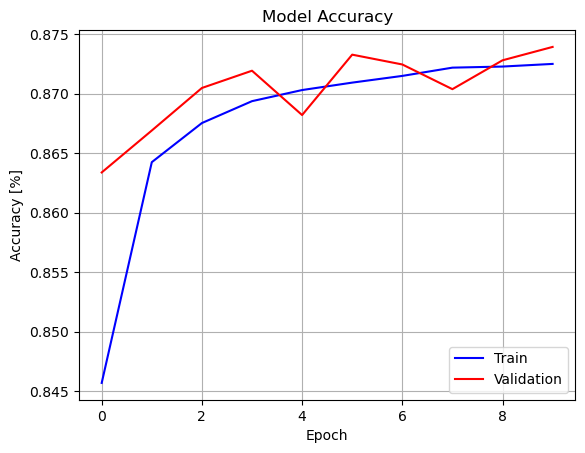

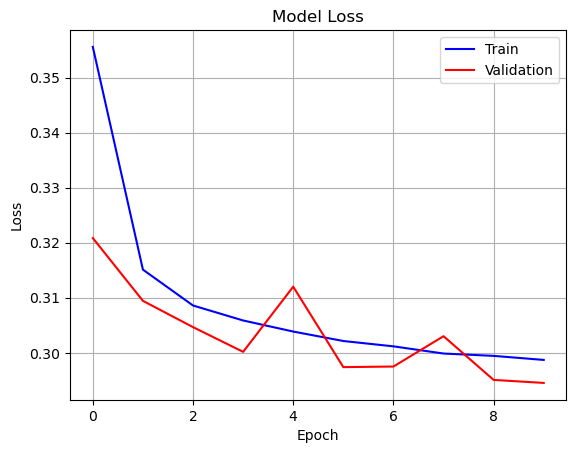

In [275]:
# Performance Plots
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='red')
plt.title('Model Accuracy')
plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid()
plt.show()
# "Loss"
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='red')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()

In [276]:
model.evaluate(x_test,  y_test, verbose=2)

3125/3125 - 1s - loss: 0.2913 - accuracy: 0.8758 - 818ms/epoch - 262us/step


[0.2913456857204437, 0.875760018825531]

In [277]:
# ROC Curve:
y_pred_keras = model.predict(x_test)

3125/3125 [==============================] - 1s 263us/step


In [278]:
y_classes = y_pred_keras.argmax(axis=-1)

In [279]:
y_pred_keras

array([[0.03922532],
       [0.9988041 ],
       [0.82446986],
       ...,
       [0.86726916],
       [0.41393083],
       [0.9403882 ]], dtype=float32)

In [280]:
y_test

array([0, 1, 1, ..., 1, 0, 1])

In [281]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)


In [282]:
fpr_keras.shape

(18708,)

In [283]:
tpr_keras.shape

(18708,)

In [288]:
signal_output = []
background_output = []
for i in range(len(y_test)):
    if y_test[i] == 1:
        signal_output.append(y_pred_keras[i][0])
    else:
        background_output.append(y_pred_keras[i][0])

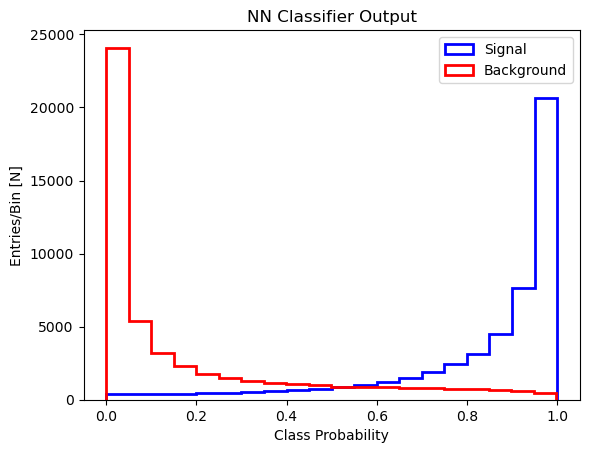

In [289]:

plt.hist(signal_output, bins=20, color='blue', label='Signal', histtype='step', linewidth=2)
plt.hist(background_output, bins=20, color='red', label='Background', histtype='step', linewidth=2)
plt.title('NN Classifier Output')
plt.xlabel('Class Probability')
plt.ylabel('Entries/Bin [N]')
plt.legend()
plt.show()

In [290]:
auc_keras = auc(fpr_keras, tpr_keras)

In [291]:
auc_keras

0.9481215626070105

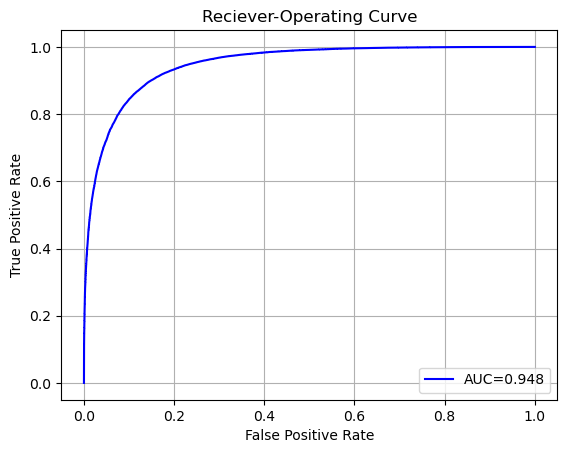

In [293]:
plt.plot(fpr_keras, tpr_keras, color='blue', label='AUC=0.948')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever-Operating Curve')
plt.grid()
plt.savefig('high-level-features-roc.png')
plt.show()